### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 0. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

C:\Users\HamIG\AppData\Local\Temp\ipykernel_119568\461334631.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [48]:
# 출력 옵션을 기본값으로 되돌리기
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [49]:
df = pd.read_csv("1week_data.csv")

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


### 1. EDA

In [50]:
# 각 변수의 데이터 타입 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [51]:
# 결측치 확인

df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [52]:
# 수치형 변수에 대한 기초통계량

df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [53]:
# 수치형 변수 열 추출

num_col = df.select_dtypes(include='int64')
num_col

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,1,22,25,14,4,27,598,9,1
1,2,41,28,28,7,13,584,20,0
2,3,47,27,10,2,29,757,21,0
3,4,35,9,12,5,17,232,18,0
4,5,53,58,24,9,2,533,18,0
...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,947,14,1
64370,64371,37,6,1,5,22,923,9,1
64371,64372,25,39,14,8,30,327,20,1
64372,64373,50,18,19,7,22,540,13,1


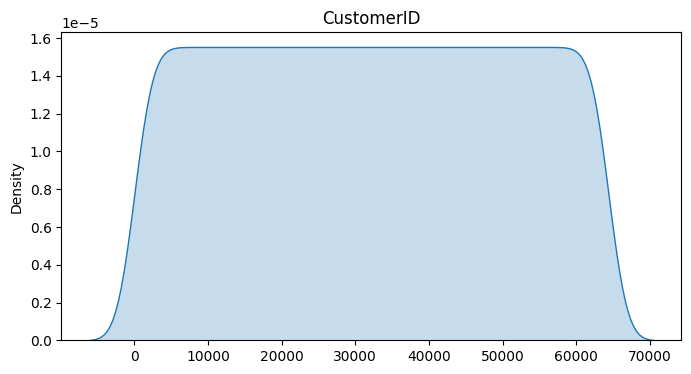

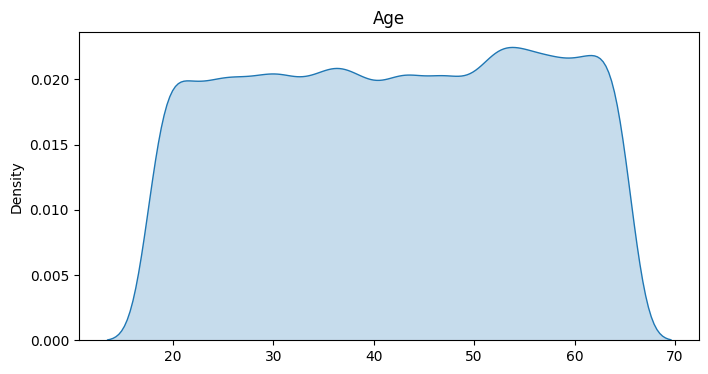

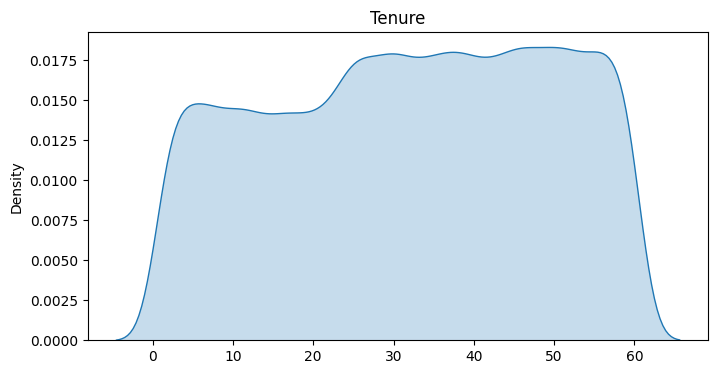

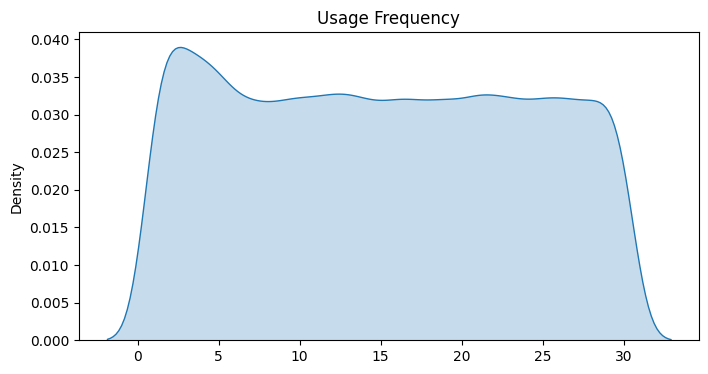

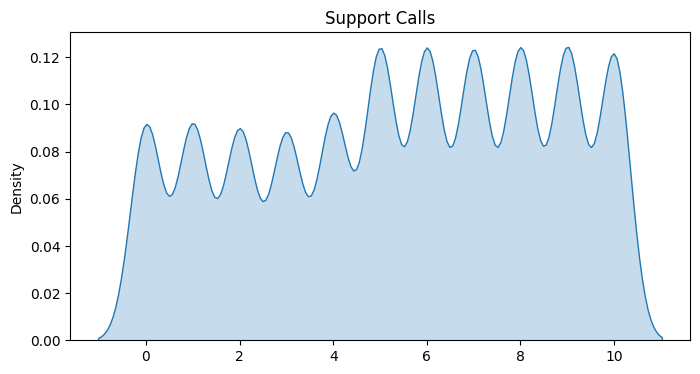

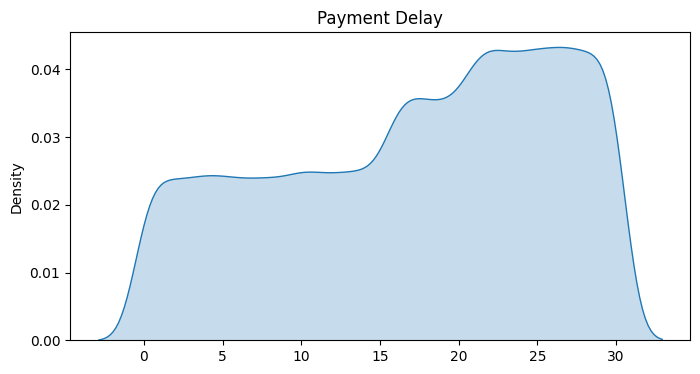

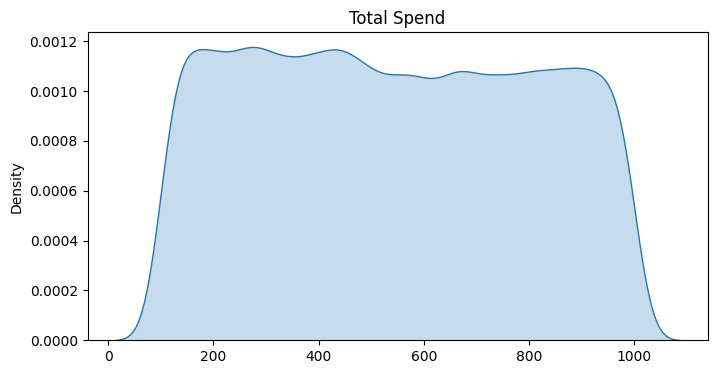

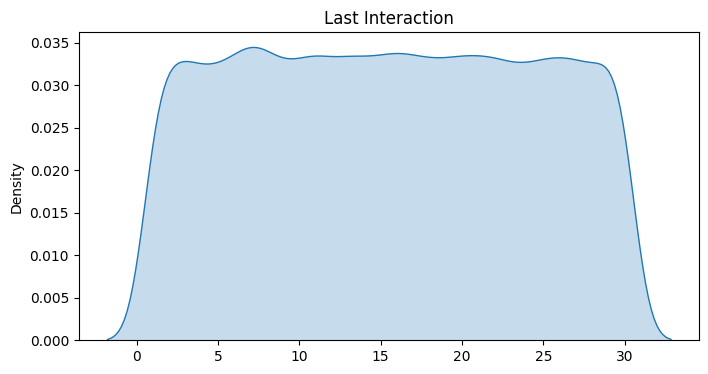

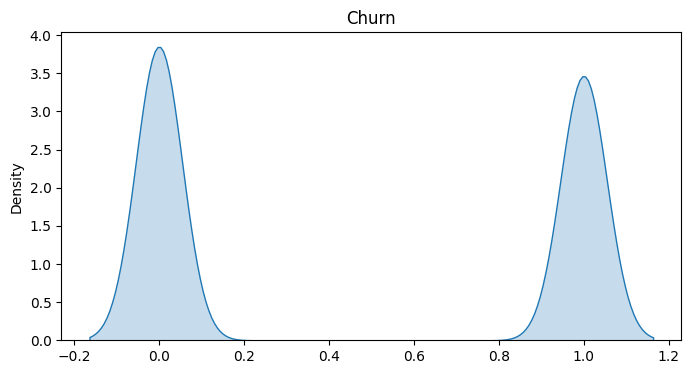

In [55]:
# 수치형 변수에 대한 밀도함수

for col in num_col:
    plt.figure(figsize=(8, 4))  
    sns.kdeplot(df[col], fill=True)  
    plt.title(col)  
    plt.xlabel('')  
    plt.show()  

In [56]:
# Churn 변수를 범주형 변수로 변환

df['Churn'] = df['Churn'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         64374 non-null  int64   
 1   Age                64374 non-null  int64   
 2   Gender             64374 non-null  object  
 3   Tenure             64374 non-null  int64   
 4   Usage Frequency    64374 non-null  int64   
 5   Support Calls      64374 non-null  int64   
 6   Payment Delay      64374 non-null  int64   
 7   Subscription Type  64374 non-null  object  
 8   Contract Length    64374 non-null  object  
 9   Total Spend        64374 non-null  int64   
 10  Last Interaction   64374 non-null  int64   
 11  Churn              64374 non-null  category
dtypes: category(1), int64(8), object(3)
memory usage: 5.5+ MB


In [57]:
# 범주형 변수 열 추출

cat_col = df.select_dtypes(include=['object', 'category']).columns
cat_col

Index(['Gender', 'Subscription Type', 'Contract Length', 'Churn'], dtype='object')

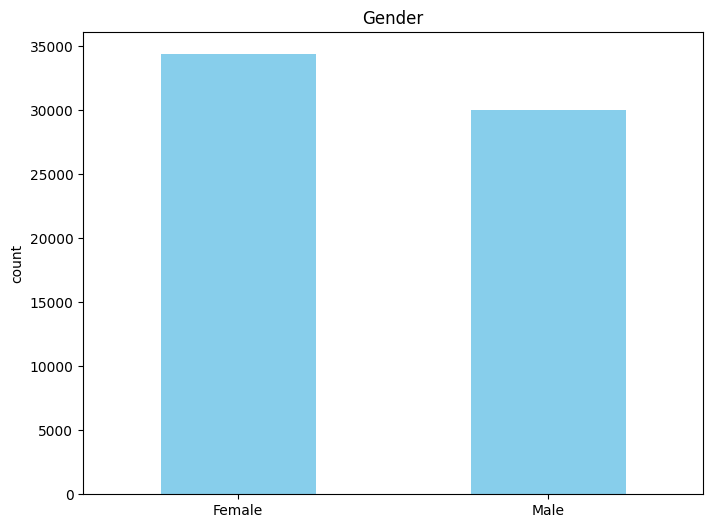

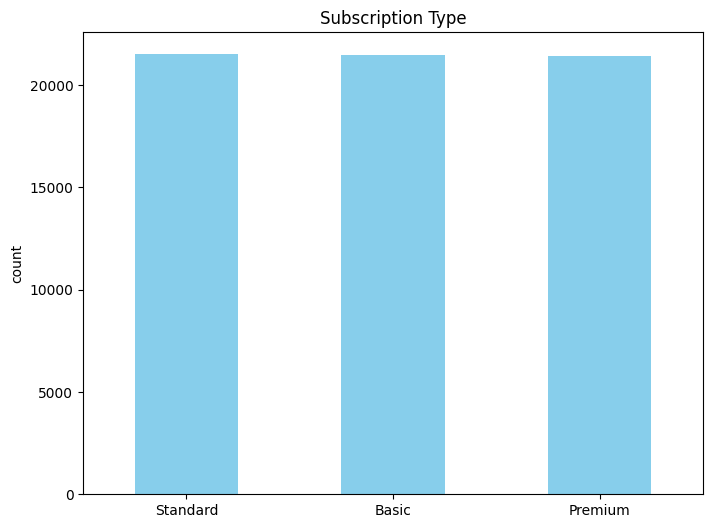

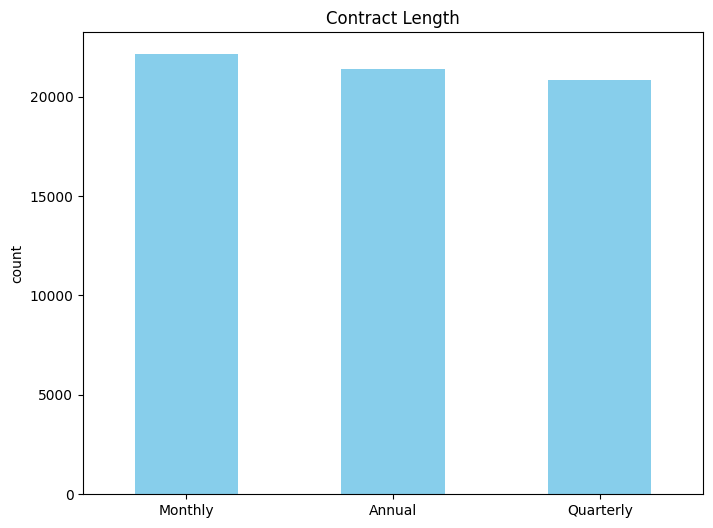

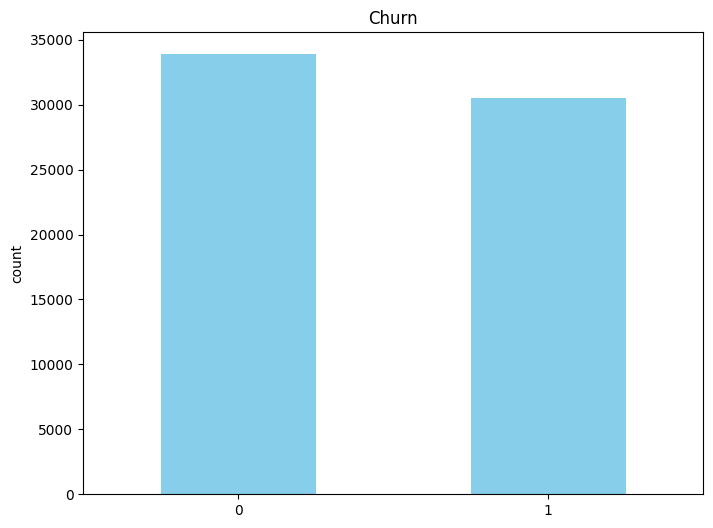

In [58]:
# 범주형 변수에 대한 막대그래프 생성

for col in cat_col:
    plt.figure(figsize=(8, 6))  
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(col)
    plt.xlabel('')  
    plt.ylabel('count')
    plt.xticks(rotation=0)
    plt.show()

### 2. 데이터 전처리

In [59]:
# CustomerID 변수를 제거 

df.drop('CustomerID', axis=1, inplace=True)

In [60]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [61]:
df_dum = pd.get_dummies(df, columns=cat_col, drop_first=True, dtype='int')

df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         64374 non-null  int64
 1   Tenure                      64374 non-null  int64
 2   Usage Frequency             64374 non-null  int64
 3   Support Calls               64374 non-null  int64
 4   Payment Delay               64374 non-null  int64
 5   Total Spend                 64374 non-null  int64
 6   Last Interaction            64374 non-null  int64
 7   Gender_Male                 64374 non-null  int32
 8   Subscription Type_Premium   64374 non-null  int32
 9   Subscription Type_Standard  64374 non-null  int32
 10  Contract Length_Monthly     64374 non-null  int32
 11  Contract Length_Quarterly   64374 non-null  int32
 12  Churn_1                     64374 non-null  int32
dtypes: int32(6), int64(7)
memory usage: 4.9 MB


In [62]:
# Churn_1을 Churn으로 변경

df_dum.rename(columns={'Churn_1': 'Churn'}, inplace=True)

df_dum.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,22,25,14,4,27,598,9,0,0,0,1,0,1
1,41,28,28,7,13,584,20,0,0,1,1,0,0
2,47,27,10,2,29,757,21,1,1,0,0,0,0
3,35,9,12,5,17,232,18,1,1,0,0,1,0
4,53,58,24,9,2,533,18,0,0,1,0,0,0


In [63]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  

In [81]:
churn_by_pay = df_dum.groupby('Payment Delay')['Churn'].value_counts().unstack()

churn_by_pay

Churn,0,1
Payment Delay,,
0,1441,153
1,1392,147
2,1353,178
3,1377,166
4,1432,156
5,1414,154
6,1405,136
7,1373,166
8,1405,154


In [82]:
churn_by_support = df_dum.groupby('Support Calls')['Churn'].value_counts().unstack()

churn_by_support

Churn,0,1
Support Calls,,
0,3764,1203
1,3801,1128
2,3698,1114
3,3550,1173
4,3509,1639
5,2632,4025
6,2615,4024
7,2522,4077
8,2596,4053


In [83]:
# 파생변수 생성 

df_dum['pay_weight'] = df_dum['Payment Delay'].apply(lambda x: 0 if x <= 15 else 1)
df_dum['sup_weight'] = df_dum['Support Calls'].apply(lambda x: 0 if x <= 4 else 1)

In [84]:
# 표준화 

std_col = list(df_dum.iloc[:,:-8])

scaler = StandardScaler()

for col in std_col:
    df_dum[col] = scaler.fit_transform(df_dum[[col]])

In [85]:
df_dum.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Churn,pay_weight,sup_weight
0,-1.434202,-0.409100,-0.122526,-0.449807,1.114538,0.218408,-0.752324,0,0,0,1,0,1,1,0
1,-0.069730,-0.233642,1.465424,0.513590,-0.467000,0.164742,0.521065,0,0,1,1,0,0,0,1
2,0.361155,-0.292128,-0.576225,-1.092072,1.340472,0.827900,0.636827,1,1,0,0,0,0,1,0
3,-0.500616,-1.344876,-0.349375,-0.128674,-0.015132,-1.184575,0.289540,1,1,0,0,1,0,1,1
4,0.792041,1.520939,1.011724,1.155855,-1.709637,-0.030756,0.289540,0,0,1,0,0,0,0,1


In [86]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         64374 non-null  float64
 1   Tenure                      64374 non-null  float64
 2   Usage Frequency             64374 non-null  float64
 3   Support Calls               64374 non-null  float64
 4   Payment Delay               64374 non-null  float64
 5   Total Spend                 64374 non-null  float64
 6   Last Interaction            64374 non-null  float64
 7   Gender_Male                 64374 non-null  int32  
 8   Subscription Type_Premium   64374 non-null  int32  
 9   Subscription Type_Standard  64374 non-null  int32  
 10  Contract Length_Monthly     64374 non-null  int32  
 11  Contract Length_Quarterly   64374 non-null  int32  
 12  Churn                       64374 non-null  int32  
 13  pay_weight                  643

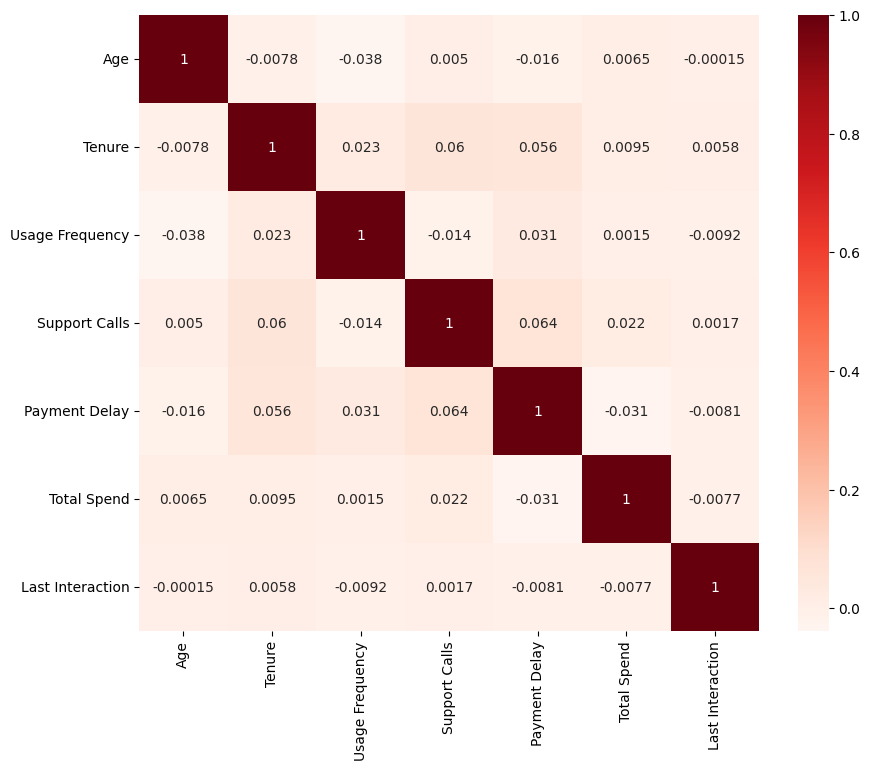

In [87]:
# 다중공선성 확인 

num_col2 = df_dum.select_dtypes(include='float64')  
corr = num_col2.corr()  

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

In [88]:
df_dum.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,Churn,pay_weight,sup_weight
0,-1.434202,-0.409100,-0.122526,-0.449807,1.114538,0.218408,-0.752324,0,0,0,1,0,1,1,0
1,-0.069730,-0.233642,1.465424,0.513590,-0.467000,0.164742,0.521065,0,0,1,1,0,0,0,1
2,0.361155,-0.292128,-0.576225,-1.092072,1.340472,0.827900,0.636827,1,1,0,0,0,0,1,0
3,-0.500616,-1.344876,-0.349375,-0.128674,-0.015132,-1.184575,0.289540,1,1,0,0,1,0,1,1
4,0.792041,1.520939,1.011724,1.155855,-1.709637,-0.030756,0.289540,0,0,1,0,0,0,0,1


### 3. 모델링

In [89]:
# 독립변수, 종속변수 분리

x = df_dum.drop(columns='Churn')  
y = df_dum['Churn']                

In [90]:
# train data set, test data set 분리

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

In [91]:
x_train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,pay_weight,sup_weight
5871,0.863856,-1.461848,1.578849,-1.734336,1.114538,0.103409,0.058014,0,1,0,0,0,1,0
40570,1.366556,0.994565,-0.576225,1.476987,-1.935571,-1.495071,0.636827,0,1,0,0,0,0,1
200,-0.428802,-0.467586,1.578849,-1.413204,1.001571,0.095743,-0.868086,1,1,0,1,0,1,0
64037,1.222927,-0.292128,-0.349375,1.155855,0.775637,-1.088743,-0.752324,0,0,0,1,0,1,1
13249,-0.859688,-0.818502,-0.803075,-1.734336,0.775637,1.747889,0.173777,0,1,0,1,0,1,0


In [92]:
y_train.head()

5871     0
40570    0
200      0
64037    1
13249    1
Name: Churn, dtype: int32

#### 서포트 벡터 머신

In [93]:
svm = SVC(random_state=42)

svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

In [94]:
def result(y_pred):
    result = {}

    result['accuracy'] = accuracy_score(y_test, y_pred)
    result['precision'] = precision_score(y_test, y_pred)
    result['recall'] = recall_score(y_test, y_pred)
    result['f1_score'] = f1_score(y_test, y_pred)
    
    return result

In [95]:
result(y_pred)

{'accuracy': 0.9642209910423031,
 'precision': 0.951585443711428,
 'recall': 0.974289138250354,
 'f1_score': 0.962803466652312}

#### 랜덤 포레스트

In [96]:
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)

y_pred2 = rf.predict(x_test)

result(y_pred2)

{'accuracy': 0.9971521772899083,
 'precision': 0.9987972884321015,
 'recall': 0.9952064495043033,
 'f1_score': 0.9969986357435198}

### 4. 결과 해석

서포트 벡터 머신에 비해 랜덤 포레스트가 더 좋은 성능을 보인다. 

#### 